In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#Data Wrangling-> Exploring the data
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [28]:
#convert data frame into array put .values
x=df.iloc[:,0:4]
y=df.iloc[:,4:5]

In [29]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [30]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [33]:

from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
pred=regr.predict(x_test)
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [36]:
ped=regr.predict(y_train)
ped

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Purchased
Feature names seen at fit time, yet now missing:
- Age
- EstimatedSalary
- Gender
- User ID


In [19]:
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(x_train,y_train)

ValueError: could not convert string to float: 'Female'

In [110]:
#Random state is hyperparameter which can be used to tune the data to increase accuracy
pred=regr.predict(x_test)

In [112]:
pred

array([81.31672814, 81.81188335, 73.31171902, ..., 58.60836033,
       75.64995192, 46.18821731])

In [114]:
len(x_train)

8000

In [116]:
len(x_test)

2000

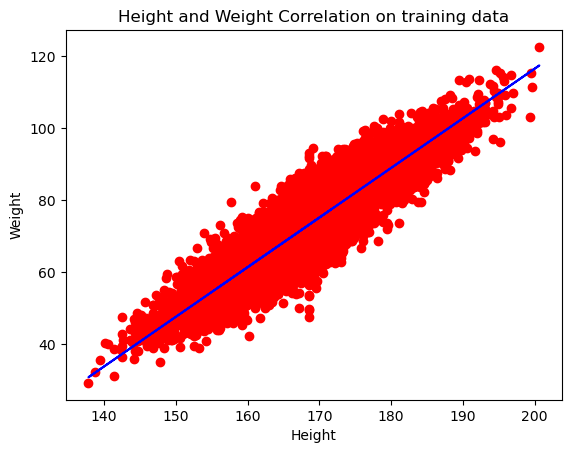

In [118]:
plt.title("Height and Weight Correlation on training data")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, regr.predict(x_train), color='blue')
plt.show()

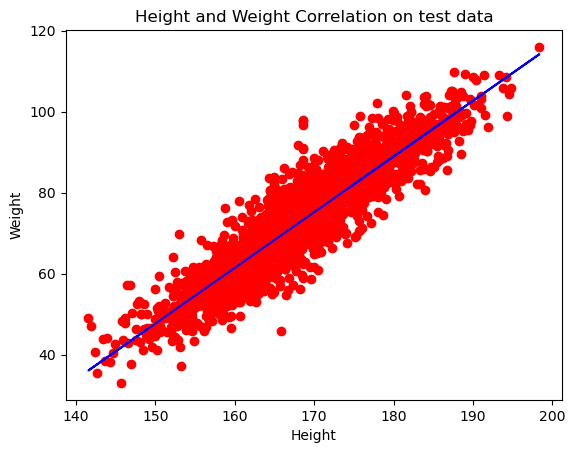

In [120]:
plt.title("Height and Weight Correlation on test data")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,regr.predict(x_test), color='blue')
plt.show()

In [122]:
my_ht=[[152.4]]
my_wt_pred=regr.predict(my_ht)
my_wt_pred

array([50.9609633])

In [124]:
from sklearn.metrics import mean_squared_error
r2_score=regr.score(x,y)
print(r2_score)

0.8514768933907293
